In [ ]:
import os
import json


In [ ]:
# if not os.path.exists('/content/data/'):

#   api_token = {"username": "prabeshsharma",
#                   "key": "e8929420b0f14df13c668815eef404a0"}

#   with open('/content/kaggle.json', 'w') as file:
#       json.dump(api_token, file)

#   os.environ["KAGGLE_CONFIG_DIR"] = "/content/"

#   os.system('kaggle datasets download -d prabeshsharma/ucf-crime-dataset-with-arrangeframe')
#   os.makedirs('/content/data/', exist_ok=True)
#   os.system('mv /content/ucf-crime-dataset-with-arrangeframe.zip /content/data/ucf-crime-dataset-with-arrangeframe.zip')
#   os.system('unzip -q /content/data/ucf-crime-dataset-with-arrangeframe.zip -d /content/data/')
#   os.remove('/content/data/ucf-crime-dataset-with-arrangeframe.zip')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# import os
# import cv2

# # Set the path to the 'Test' folder and output directory
# train_path = "/content/data/Datasets/Train"
# output_base_path = "/content/drive/MyDrive/NormalAbnormal/Train"

# # Function to create video from frames
# def frames_to_video(image_folder, output_video_path, frame_rate=10):
#     images = [img for img in os.listdir(image_folder) if img.endswith(".png")]
#     images.sort()  # Ensure images are in correct order

#     if len(images) == 0:
#         print(f"No images found in {image_folder}")
#         return

#     # Read the first image to get width and height
#     first_image = cv2.imread(os.path.join(image_folder, images[0]))
#     height, width, layers = first_image.shape

#     # Define the video codec and create a VideoWriter object
#     fourcc = cv2.VideoWriter_fourcc(*'XVID')  # Use 'XVID' codec for .avi
#     video = cv2.VideoWriter(output_video_path, fourcc, frame_rate, (width, height))

#     for image in images:
#         img_path = os.path.join(image_folder, image)
#         frame = cv2.imread(img_path)
#         video.write(frame)  # Write the frame to the video

#     video.release()  # Release the video writer
#     print(f"Video saved to {output_video_path}")

# # Create 'NormalVideos' and 'AbnormalVideos' output directories
# normal_output_path = os.path.join(output_base_path, "NormalVideos")
# abnormal_output_path = os.path.join(output_base_path, "AbnormalVideos")
# os.makedirs(normal_output_path, exist_ok=True)
# os.makedirs(abnormal_output_path, exist_ok=True)

# # Traverse through the folder structure
# for class_folder in os.listdir(train_path):
#     class_folder_path = os.path.join(train_path, class_folder)

#     if os.path.isdir(class_folder_path):
#         for video_folder in os.listdir(class_folder_path):
#             video_folder_path = os.path.join(class_folder_path, video_folder)

#             if os.path.isdir(video_folder_path):
#                 # Check if the current class is "NormalVideos"
#                 if class_folder == "NormalVideos":
#                     output_video_path = os.path.join(normal_output_path, f"{video_folder}.avi")
#                 else:
#                     # All other videos go directly into the AbnormalVideos folder
#                     output_video_path = os.path.join(abnormal_output_path, f"{video_folder}.avi")

#                 # Convert frames to video with 1x normal speed
#                 frames_to_video(video_folder_path, output_video_path, frame_rate=10)


In [ ]:
import pathlib
dataset_root_path = "/content/drive/MyDrive/NormalAbnormal"
dataset_root_path = pathlib.Path(dataset_root_path)

In [ ]:
video_count_train = len(list(dataset_root_path.glob("Train/*/*.avi")))
video_count_test = len(list(dataset_root_path.glob("Test/*/*.avi")))
video_total = video_count_train + video_count_test
print(f"Total videos: {video_total}")

Total videos: 1900


In [ ]:
all_video_file_paths = (
    list(dataset_root_path.glob("Train/*/*.avi"))
    + list(dataset_root_path.glob("Test/*/*.avi"))
 )
all_video_file_paths[:5]

[PosixPath('/content/drive/MyDrive/NormalAbnormal/Train/NormalVideos/Normal_Videos560.avi'),
 PosixPath('/content/drive/MyDrive/NormalAbnormal/Train/NormalVideos/Normal_Videos534.avi'),
 PosixPath('/content/drive/MyDrive/NormalAbnormal/Train/NormalVideos/Normal_Videos192.avi'),
 PosixPath('/content/drive/MyDrive/NormalAbnormal/Train/NormalVideos/Normal_Videos507.avi'),
 PosixPath('/content/drive/MyDrive/NormalAbnormal/Train/NormalVideos/Normal_Videos667.avi')]

In [ ]:
class_labels = sorted({str(path).split("/")[6] for path in all_video_file_paths})
label2id = {label: i for i, label in enumerate(class_labels)}
id2label = {i: label for label, i in label2id.items()}

print(f"Unique classes: {list(label2id.keys())}.")


Unique classes: ['AbnormalVideos', 'NormalVideos'].


In [ ]:
from huggingface_hub import notebook_login

notebook_login()

In [ ]:
!pip install torchvision==0.16.1 --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 76.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 670.2/670.2 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 108.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 82.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 55.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.8/209.8 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
!pip install -q pytorchvideo transformers evaluate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.7/132.7 kB 11.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 472.7/472.7 kB 35.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.1/33.1 MB 56.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 14.0 MB/s eta 0:00:00


In [ ]:
# from transformers import AutoProcessor, AutoModelForVideoClassification

# # Model checkpoint
# model_ckpt = "prathameshdalal/vivit-b-16x2-kinetics400-UCF-Crime"

# # Define label2id and id2label mappings
# label2id = {"NormalVideos": 0, "AbnormalVideos": 1}
# id2label = {0: "NormalVideos", 1: "AbnormalVideos"}

# # Load the processor and model with additional parameters
# image_processor = AutoProcessor.from_pretrained(model_ckpt)
# model = AutoModelForVideoClassification.from_pretrained(
#     model_ckpt,
#     label2id=label2id,
#     id2label=id2label,
#     ignore_mismatched_sizes=True  # This helps with fine-tuning an already fine-tuned checkpoint
# )


In [ ]:
from transformers import VideoMAEImageProcessor, VideoMAEForVideoClassification

model_ckpt = "MCG-NJU/videomae-base"
image_processor = VideoMAEImageProcessor.from_pretrained(model_ckpt)
model = VideoMAEForVideoClassification.from_pretrained(
    model_ckpt,
    label2id=label2id,
    id2label=id2label,
    ignore_mismatched_sizes=True,  # provide this in case you're planning to fine-tune an already fine-tuned checkpoint
)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Some weights of VideoMAEForVideoClassification were not initialized from the model checkpoint at MCG-NJU/videomae-base and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
import pytorchvideo.data

from pytorchvideo.transforms import (
    ApplyTransformToKey,
    Normalize,
    RandomShortSideScale,
    RemoveKey,
    ShortSideScale,
    UniformTemporalSubsample,
)

from torchvision.transforms import (
    Compose,
    Lambda,
    RandomCrop,
    RandomHorizontalFlip,
    Resize,
)

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional_tensor.py:5: UserWarning: The torchvision.transforms.functional_tensor module is deprecated in 0.15 and will be **removed in 0.17**. Please don't rely on it. You probably just need to use APIs in torchvision.transforms.functional or in torchvision.transforms.v2.functional.
  warnings.warn(


In [ ]:
mean = image_processor.image_mean
std = image_processor.image_std
if "shortest_edge" in image_processor.size:
    height = width = image_processor.size["shortest_edge"]
else:
    height = image_processor.size["height"]
    width = image_processor.size["width"]
resize_to = (height, width)

num_frames_to_sample = model.config.num_frames
sample_rate = 4
fps = 30
clip_duration = num_frames_to_sample * sample_rate / fps

In [ ]:
train_transform = Compose(
    [
        ApplyTransformToKey(
            key="video",
            transform=Compose(
                [
                    UniformTemporalSubsample(num_frames_to_sample),
                    Lambda(lambda x: x / 255.0),
                    Normalize(mean, std),
                    RandomShortSideScale(min_size=256, max_size=320),
                    RandomCrop(resize_to),
                    RandomHorizontalFlip(p=0.5),
                ]
            ),
        ),
    ]
)

train_dataset = pytorchvideo.data.Ucf101(
    data_path=os.path.join(dataset_root_path, "Train"),
    clip_sampler=pytorchvideo.data.make_clip_sampler("random", clip_duration),
    decode_audio=False,
    transform=train_transform,
)

In [ ]:
val_transform = Compose(
    [
        ApplyTransformToKey(
            key="video",
            transform=Compose(
                [
                    UniformTemporalSubsample(num_frames_to_sample),
                    Lambda(lambda x: x / 255.0),
                    Normalize(mean, std),
                    Resize(resize_to),
                ]
            ),
        ),
    ]
)



test_dataset = pytorchvideo.data.Ucf101(
    data_path=os.path.join(dataset_root_path, "Test"),
    clip_sampler=pytorchvideo.data.make_clip_sampler("uniform", clip_duration),
    decode_audio=False,
    transform=val_transform,
)

In [ ]:
print(train_dataset.num_videos, test_dataset.num_videos)

1610 290


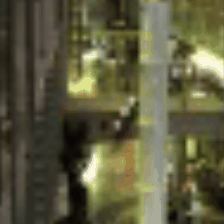

In [ ]:
import imageio
import numpy as np
from IPython.display import Image

def unnormalize_img(img):
    """Un-normalizes the image pixels."""
    img = (img * std) + mean
    img = (img * 255).astype("uint8")
    return img.clip(0, 255)

def create_gif(video_tensor, filename="sample.gif"):
    """Prepares a GIF from a video tensor.

    The video tensor is expected to have the following shape:
    (num_frames, num_channels, height, width).
    """
    frames = []
    for video_frame in video_tensor:
        frame_unnormalized = unnormalize_img(video_frame.permute(1, 2, 0).numpy())
        frames.append(frame_unnormalized)
    kargs = {"duration": 0.25}
    imageio.mimsave(filename, frames, "GIF", **kargs)
    return filename

def display_gif(video_tensor, gif_name="sample.gif"):
    """Prepares and displays a GIF from a video tensor."""
    video_tensor = video_tensor.permute(1, 0, 2, 3)
    gif_filename = create_gif(video_tensor, gif_name)
    return Image(filename=gif_filename)

sample_video = next(iter(train_dataset))
video_tensor = sample_video["video"]
display_gif(video_tensor)

In [ ]:
from transformers import TrainingArguments, Trainer

model_name = model_ckpt.split("/")[-1]
new_model_name = f"{model_name}-finetuned-ucf101-normalAbnormal"
num_epochs = 1
batch_size = 8

args = TrainingArguments(
    new_model_name,
    remove_unused_columns=False,
    eval_strategy="epoch",
    save_strategy="epoch",
    learning_rate=5e-5,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    warmup_ratio=0.1,
    logging_steps=10,
    load_best_model_at_end=True,
    metric_for_best_model="accuracy",
    push_to_hub=True,
    max_steps=(train_dataset.num_videos // batch_size) * num_epochs,
    num_train_epochs=num_epochs,


)

In [ ]:
import evaluate

metric = evaluate.load("accuracy")


def compute_metrics(eval_pred):
    predictions = np.argmax(eval_pred.predictions, axis=1)
    return metric.compute(predictions=predictions, references=eval_pred.label_ids)

In [ ]:
import torch
import os

In [ ]:
import cv2
import os
import torch
from torch.utils.data import Dataset

class VideoDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        """
        Args:
            root_dir (string): Directory with all the class folders and video files.
            transform (callable, optional): Optional transform to be applied on a sample.
        """
        self.root_dir = root_dir
        self.transform = transform
        self.data = []

        # Traverse the directory structure and collect video paths and labels
        for class_name in os.listdir(root_dir):
            class_path = os.path.join(root_dir, class_name)
            if os.path.isdir(class_path):
                for video_file in os.listdir(class_path):
                    video_path = os.path.join(class_path, video_file)
                    if video_file.endswith('.avi'):  # Change this to your video format if needed
                        self.data.append((video_path, class_name))  # (video path, class label)

        # Convert class labels to indices
        self.class_to_idx = {cls_name: idx for idx, cls_name in enumerate(os.listdir(root_dir))}

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        video_path, class_name = self.data[idx]
        label = self.class_to_idx[class_name]

        # Load the video
        cap = cv2.VideoCapture(video_path)
        frames = []

        while True:
            ret, frame = cap.read()
            if not ret:
                break
            frames.append(frame)

        cap.release()
        frames = torch.tensor(frames)  # Convert to tensor; shape might need to be adjusted

        # Apply any transformations (resize, normalize, etc.)
        if self.transform:
            frames = self.transform(frames)

        return {"video": frames, "label": label}


In [ ]:
def collate_fn(examples):
    # permute to (num_frames, num_channels, height, width)
    pixel_values = torch.stack(
        [example["video"].permute(1, 0, 2, 3) for example in examples]
    )
    labels = torch.tensor([example["label"] for example in examples])
    return {"pixel_values": pixel_values, "labels": labels}

In [ ]:
root_dir = '/content/drive/MyDrive/Video/Train'  # Adjust this path
video_dataset = VideoDataset(root_dir)


In [ ]:
sample = video_dataset[0]
print("Sample video shape:", sample["video"].shape)  # Should show (num_frames, height, width, channels)
print("Sample label:", sample["label"])


Sample video shape: torch.Size([1842, 64, 64, 3])
Sample label: 0


<ipython-input-33-87ef7ff67bf8>:47: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:261.)
  frames = torch.tensor(frames)  # Convert to tensor; shape might need to be adjusted


In [ ]:
trainer = Trainer(
    model,
    args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    tokenizer=image_processor,
    compute_metrics=compute_metrics,
    data_collator=collate_fn,

)

max_steps is given, it will override any value given in num_train_epochs


In [ ]:
train_results = trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy
1,0.598500,0.444698,0.792356


/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


In [ ]:
trainer.push_to_hub()

CommitInfo(commit_url='https://huggingface.co/Prabesh06/videomae-base-finetuned-ucf101-normalAbnormal/commit/1e4e10e668c51ca7641e5448e224f49c52f382b8', commit_message='End of training', commit_description='', oid='1e4e10e668c51ca7641e5448e224f49c52f382b8', pr_url=None, pr_revision=None, pr_num=None)